# Downloading libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import MinMaxScaler

# Loading and preprocessing data

In [3]:
txt_file = 'household_power_consumption.txt'
data = pd.read_csv(txt_file, delimiter = ";", low_memory = False)
csv_file = 'output_file.csv'
data.to_csv(csv_file, index = False)

In [4]:
data.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


In [5]:
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')
data = data.drop(columns=['Date', 'Time'])

In [6]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [7]:
data.set_index('Datetime', inplace=True)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [8]:
data.shape

(2075259, 7)

In [9]:
data.columns.to_list()

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3']

In [10]:
data.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [12]:
data.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [13]:
data['Sub_metering_3'] = data['Sub_metering_3'].ffill()
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [14]:
# Replace non-numeric values with NaN
data.replace('?', np.nan, inplace=True)

# Convert columns to numeric, forcing errors to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Drop columns with all NaN values (optional)
data.dropna(axis=1, how='all', inplace=True)

# Drop rows with any NaN values (optional)
data.dropna(axis=0, how='any', inplace=True)

# Exploratory Data Analysis


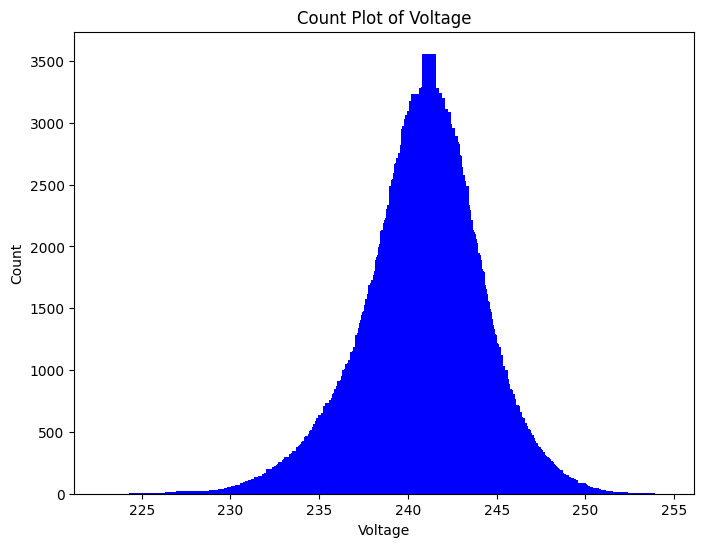

In [15]:
# Univariate Analysis
voltage_counts = data['Voltage'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(voltage_counts.index, voltage_counts, color='blue')
plt.title('Count Plot of Voltage')
plt.xlabel('Voltage')
plt.ylabel('Count')
plt.show()

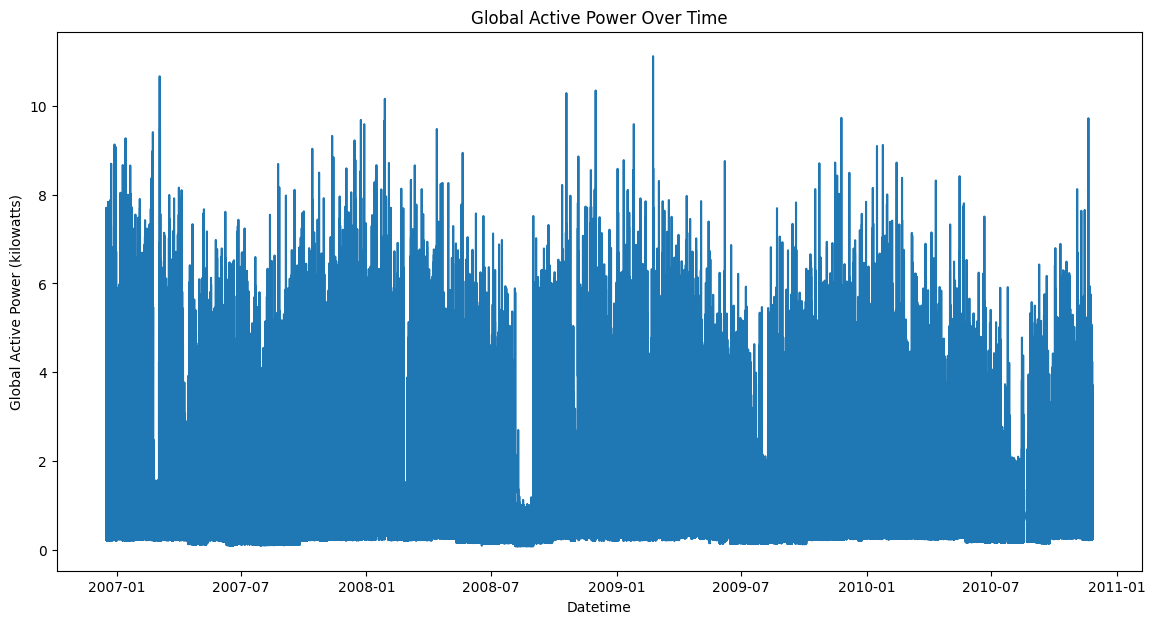

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(data['Global_active_power'])
plt.title('Global Active Power Over Time')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()

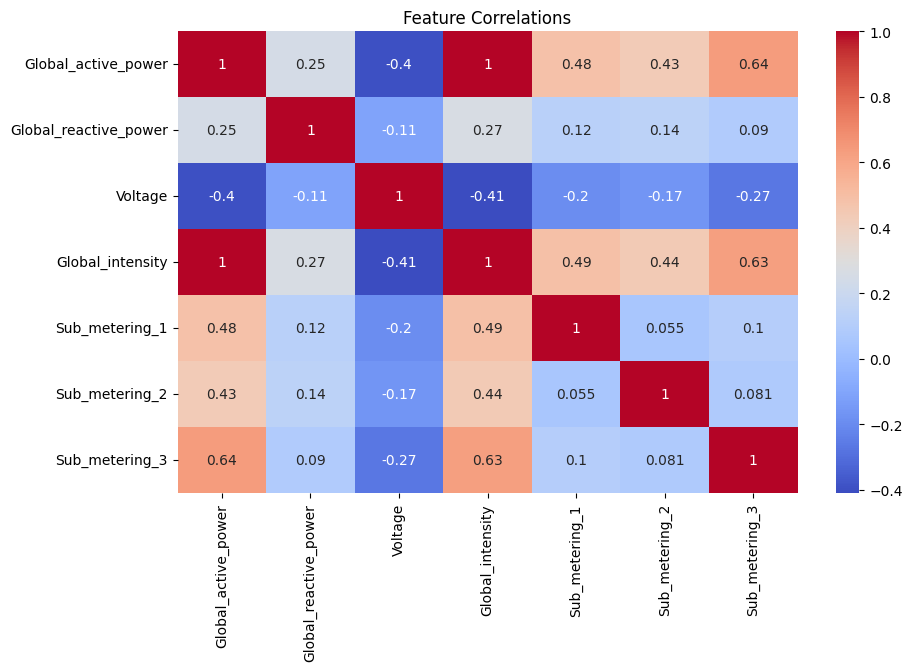

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

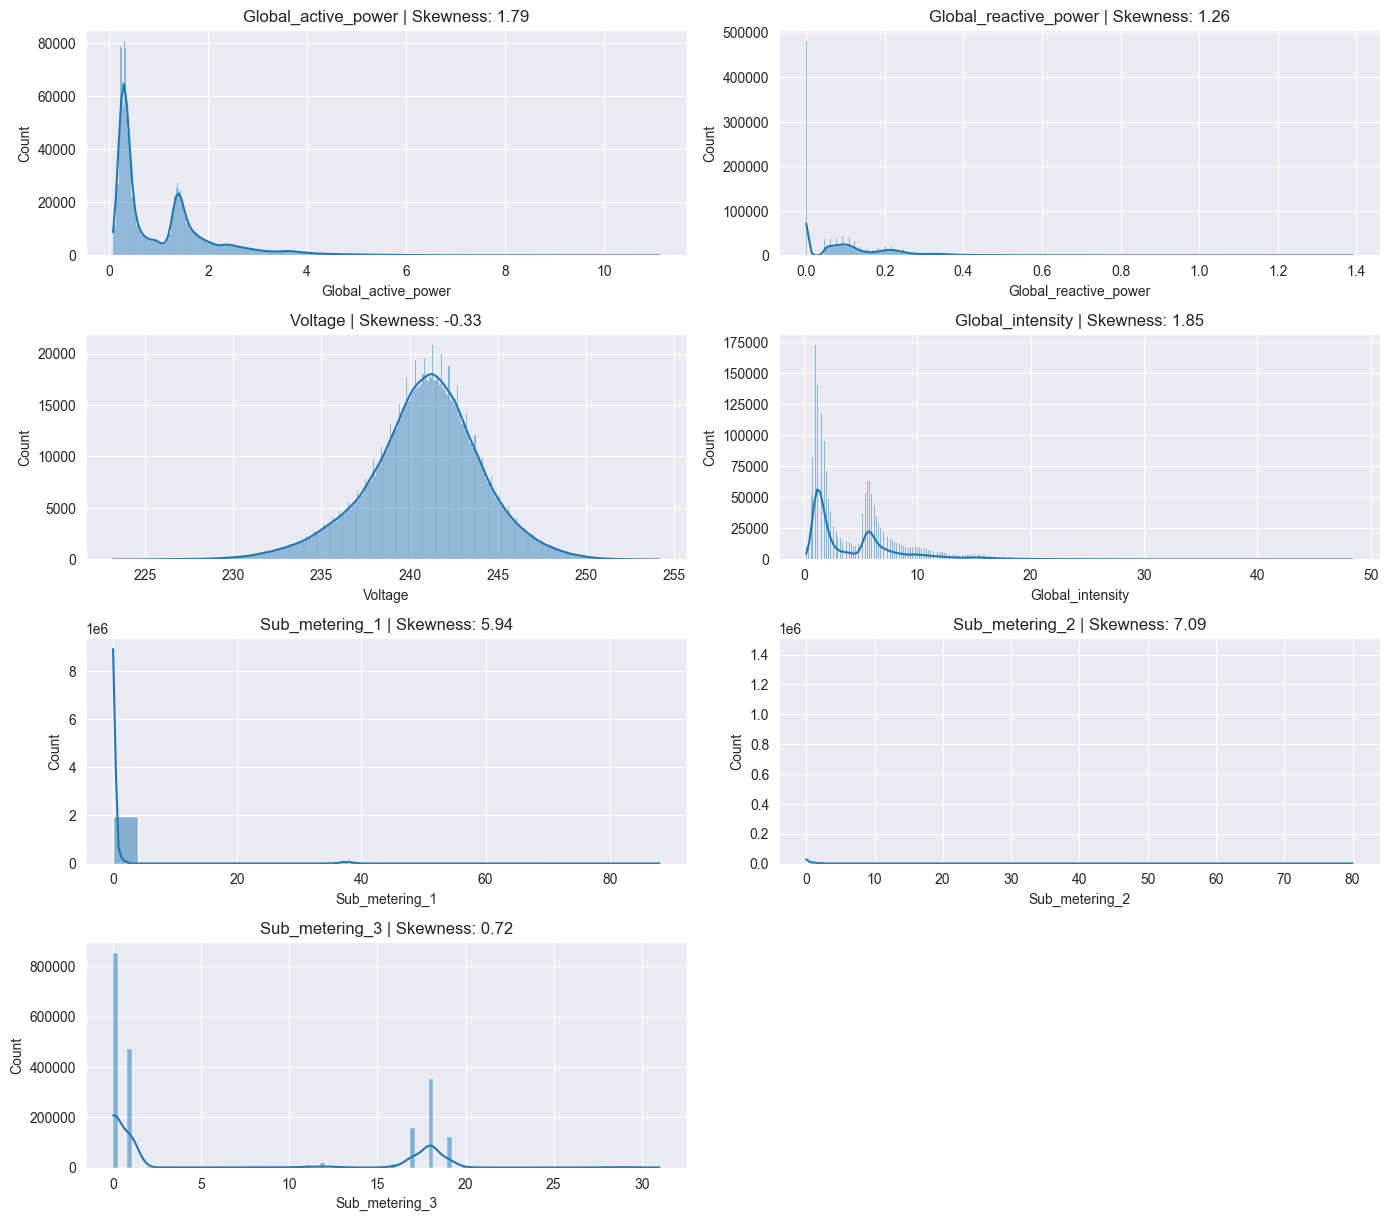

In [18]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# Time Series Forecasting Models


In [19]:
# Prepare data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Global_active_power']])

In [20]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 30
X, y = create_sequences(scaled_data, SEQ_LENGTH)

In [21]:
# Split into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(LSTM(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\hpenv\anaconda3\envs\test\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

Epoch 1/10
51232/51232 ━━━━━━━━━━━━━━━━━━━━ 1709s 33ms/step - loss: 7.1264e-04 - val_loss: 3.8757e-04
Epoch 2/10
51232/51232 ━━━━━━━━━━━━━━━━━━━━ 1656s 32ms/step - loss: 5.9450e-04 - val_loss: 3.9285e-04
Epoch 3/10
51232/51232 ━━━━━━━━━━━━━━━━━━━━ 1508s 29ms/step - loss: 5.6161e-04 - val_loss: 3.6175e-04
Epoch 4/10
51232/51232 ━━━━━━━━━━━━━━━━━━━━ 1498s 29ms/step - loss: 5.3779e-04 - val_loss: 3.5727e-04
Epoch 5/10
51232/51232 ━━━━━━━━━━━━━━━━━━━━ 1518s 30ms/step - loss: 5.1886e-04 - val_loss: 3.4251e-04
Epoch 6/10
51232/51232 ━━━━━━━━━━━━━━━━━━━━ 1530s 30ms/step - loss: 5.1292e-04 - val_loss: 3.6114e-04
Epoch 7/10
51232/51232 ━━━━━━━━━━━━━━━━━━━━ 1673s 32ms/step - loss: 5.0129e-04 - val_loss: 3.3815e-04
Epoch 8/10
51232/51232 ━━━━━━━━━━━━━━━━━━━━ 1644s 32ms/step - loss: 4.9365e-04 - val_loss: 3.5150e-04
Epoch 9/10
51232/51232 ━━━━━━━━━━━━━━━━━━━━ 1475s 29ms/step - loss: 4.8869e-04 - val_loss: 3.3186e-04
Epoch 10/10
51232/51232 ━━━━━━━━━━━━━━━━━━━━ 1739s 34ms/step - loss: 4.8201e-04 - 

In [25]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

12808/12808 ━━━━━━━━━━━━━━━━━━━━ 191s 15ms/step


In [26]:
rmse = math.sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.227


In [ ]:
train = data[:split+SEQ_LENGTH]
valid = data[split+SEQ_LENGTH:]
valid['Predictions'] = predictions

plt.figure(figsize=(15, 6))
plt.plot(train['Global_active_power'])
plt.plot(valid[['Global_active_power', 'Predictions']])
plt.title('LSTM Model')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()

C:\Users\hpenv\AppData\Local\Temp\ipykernel_22072\3828523742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions
